In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Orchids production is determined by sunlight and humidity
- if sunlight is less than 7 hours, production goes down 4% an hour
- is sunlight is more than 7 hours, production goes up 4% an hour
- if humidity is less than 60%, production falls 2% every 5% humidity falls
- if humidity is less more than 80%, production falls 2% every 5% humidity rises

Import and export costs also exist.

Have to consider storage space, or orchids will lose value.

In [72]:
# Initialize dataframes
df1 = pd.read_csv('data/round2/prices_round_2_day_-1.csv', delimiter=';')
df2 = pd.read_csv('data/round2/prices_round_2_day_0.csv', delimiter=';')
df3 = pd.read_csv('data/round2/prices_round_2_day_1.csv', delimiter=';')

# Concatenate DataFrames vertically
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

In [73]:
# print min and max for sunlight and humidity
print("sunlight min: " + str(combined_df['SUNLIGHT'].min()))
print("sunlight max: " + str(combined_df['SUNLIGHT'].max()))

print("humidity min: " + str(combined_df['HUMIDITY'].min()))
print("humidity max: " + str(combined_df['HUMIDITY'].max()))

sunlight min: 1397.3049
sunlight max: 4513.9863
humidity min: 59.99958
humidity max: 97.51327


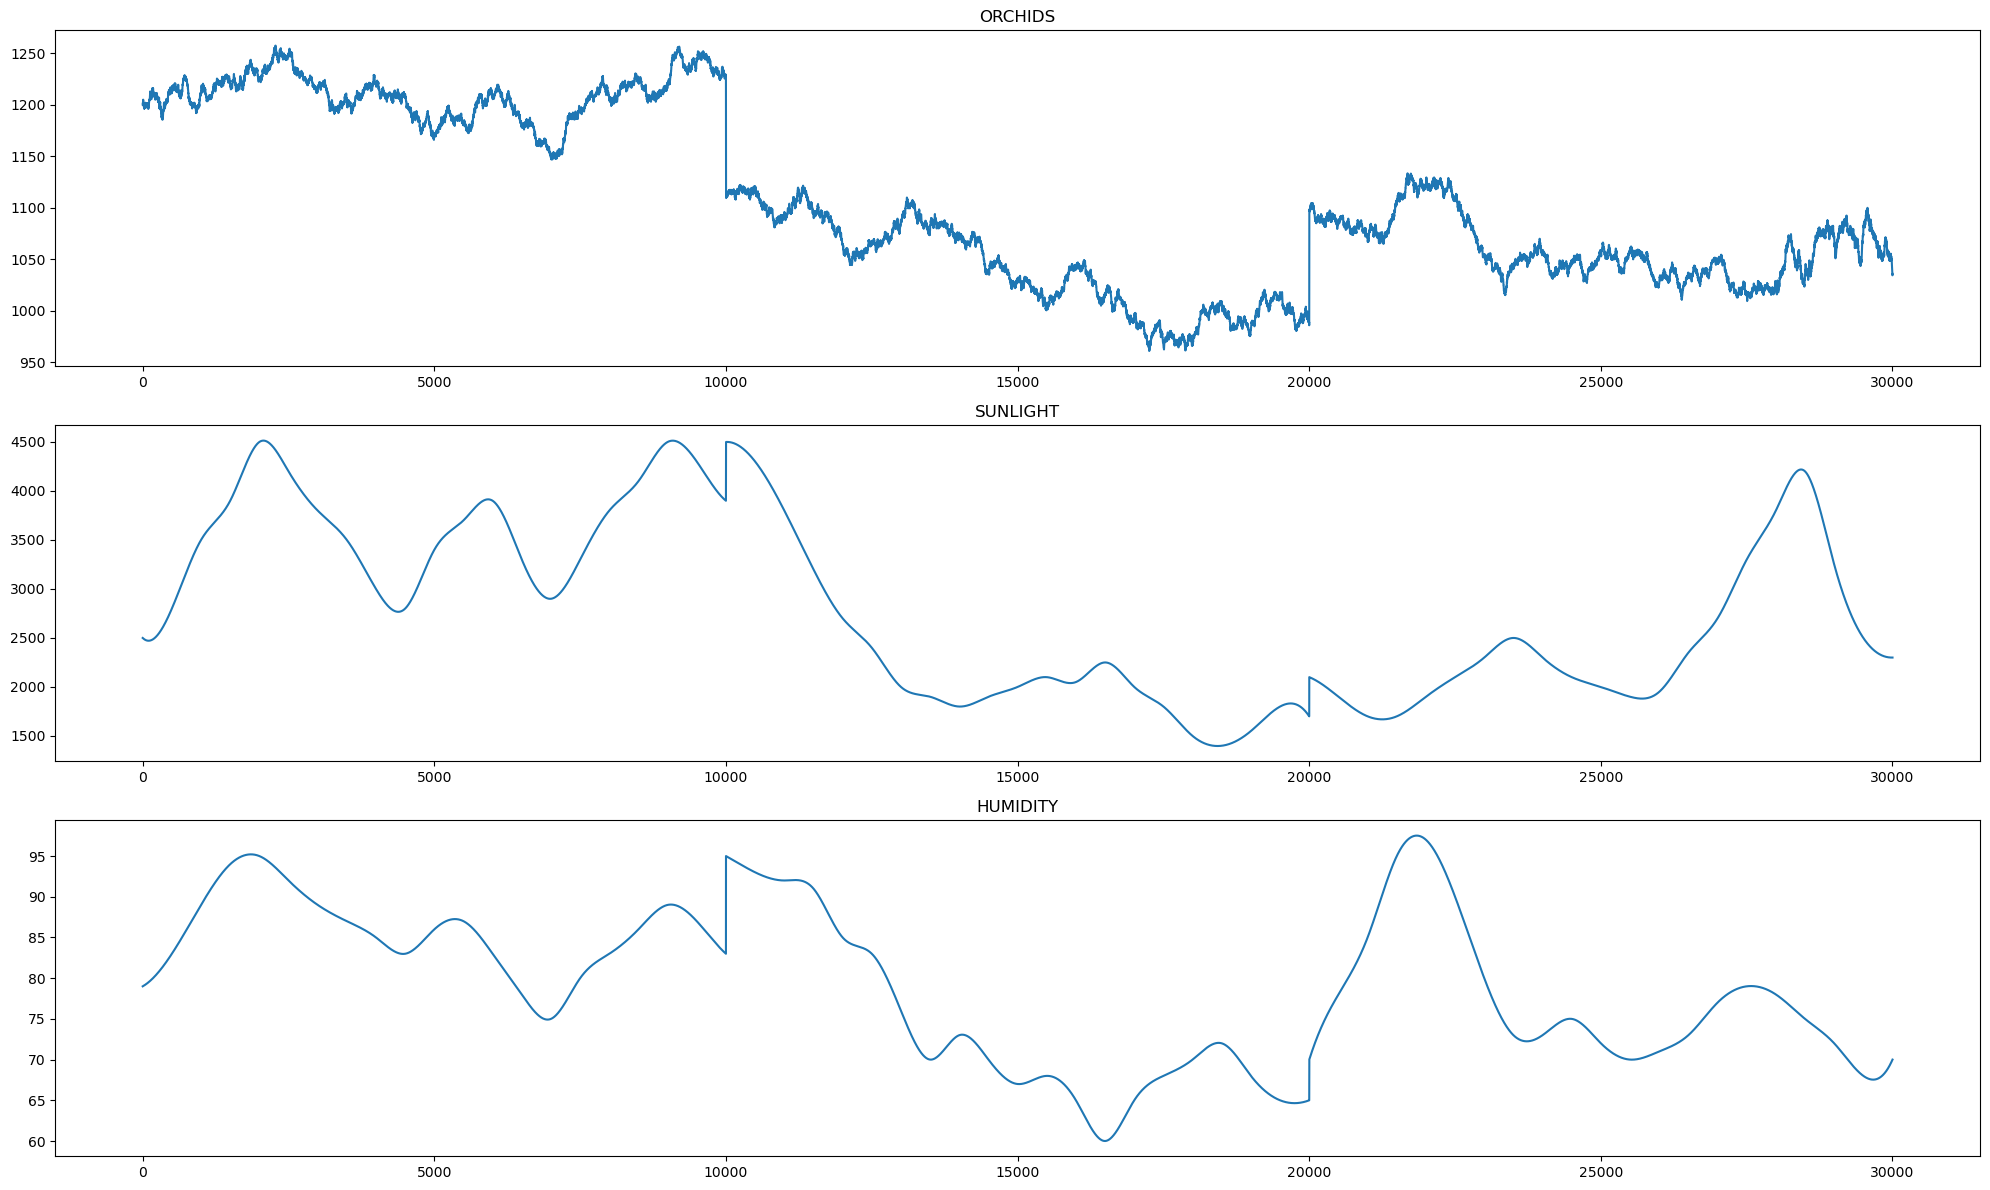

In [74]:
fig, axs = plt.subplots(3, figsize=(20, 12))

axs[0].plot(combined_df['ORCHIDS'])
axs[0].set_title('ORCHIDS')

axs[1].plot(combined_df['SUNLIGHT'])
axs[1].set_title('SUNLIGHT')

axs[2].plot(combined_df['HUMIDITY'])
axs[2].set_title('HUMIDITY')

plt.tight_layout()

In [75]:
# normalize sunlight and humidity
combined_df['SUNLIGHT'] = (combined_df['SUNLIGHT'] - combined_df['SUNLIGHT'].min()) / (combined_df['SUNLIGHT'].max() - combined_df['SUNLIGHT'].min())
combined_df['HUMIDITY'] = (combined_df['HUMIDITY'] - combined_df['HUMIDITY'].min()) / (combined_df['HUMIDITY'].max() - combined_df['HUMIDITY'].min())

# combine the two into a row
combined_df['SUNLIGHT_HUMIDITY'] = -(combined_df['SUNLIGHT'] + combined_df['HUMIDITY'])
combined_df['SUNLIGHT_HUMIDITY_DIFF'] = combined_df['SUNLIGHT_HUMIDITY'].diff(500)


Text(0.5, 1.0, 'SUNLIGHT_HUMIDITY_DIFF')

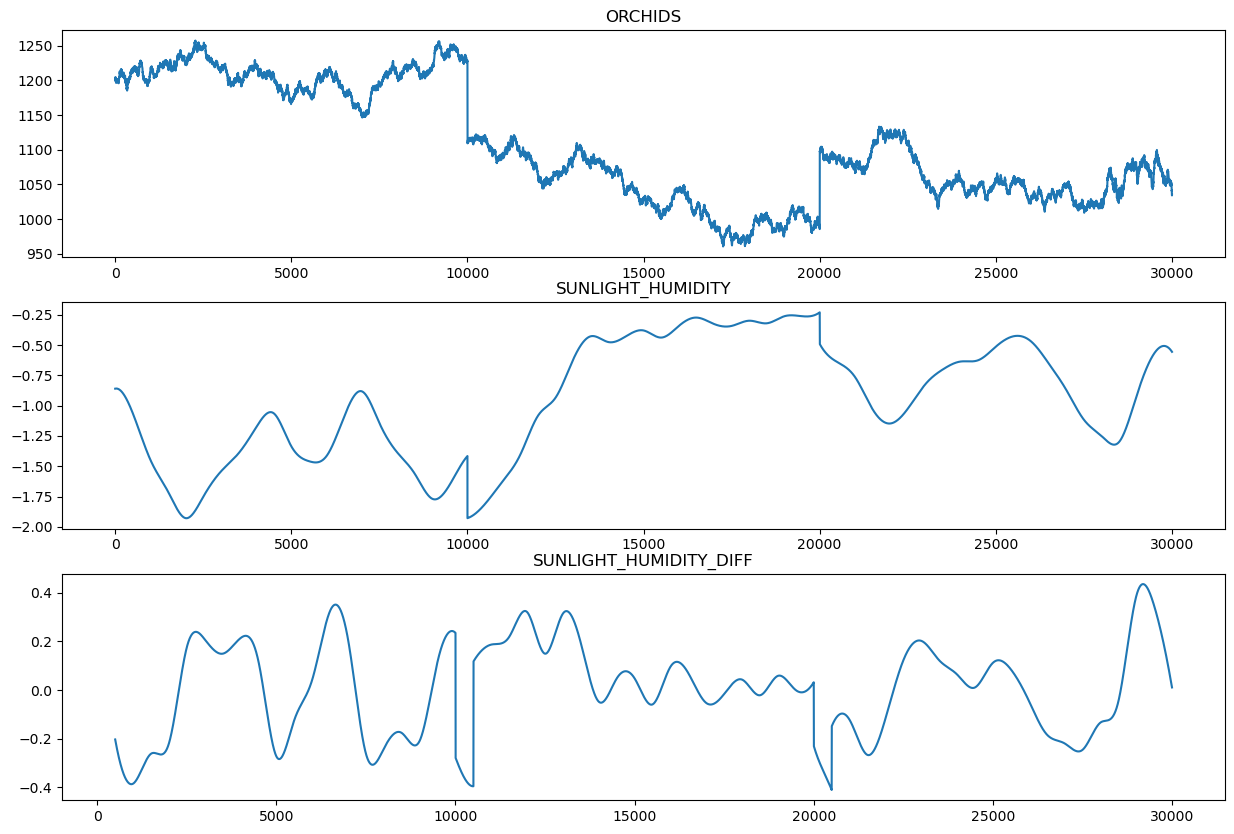

In [76]:
# plot the combined feature
fig, axs = plt.subplots(3, figsize=(15, 10))

axs[0].plot(combined_df['ORCHIDS'])
axs[0].set_title('ORCHIDS')

axs[1].plot(combined_df['SUNLIGHT_HUMIDITY'])
axs[1].set_title('SUNLIGHT_HUMIDITY')

axs[2].plot(combined_df['SUNLIGHT_HUMIDITY_DIFF'])
axs[2].set_title('SUNLIGHT_HUMIDITY_DIFF')  